## 10. Calculate the yield of the single areas N-9.1, N-9.2, N-9.3 without external effects. 
Use the long-term corrected ERA5 data as input. 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import foxes
import foxes.variables as FV

# Data Paths
lidar_path = 'data/measurements/'
era5_path = 'data/reanalysis/'
turbines_existing_path = 'data/turbine-info/coordinates/existing/'
turbines_planned_future_path = 'data/turbine-info/coordinates/planned_future/'
turbines_planned_in_operation_before_2030_path = 'data/turbine-info/coordinates/planned_in_operation_before_2030/'
turbines_planned_netherlands_path = 'data/turbine-info/coordinates/planned_netherlands/'
turbines_area_of_interest_path = 'data/turbine-info/coordinates/area_of_interest/'
turbine_power_curves_path = 'data/turbine-info/power_curves/'

# Function to read and extract data from csv files
def read_csv(path):
    data = pd.read_csv(path)
    return data

In [2]:
data = pd.read_csv('LT_corrected_buoy6.csv', index_col=0)
data.index = pd.to_datetime(data.index)
data_2023 = data[data.index.year == 2023]
data_2023 = data_2023.resample('D').mean()
data_2023

,long-term_WS150,long-term_WD150
time,,
2023-01-01,17.606153,225.116109
2023-01-02,9.317414,261.128048
2023-01-03,12.832915,212.154650
2023-01-04,19.869215,242.579148
2023-01-05,10.993387,251.790111
...,...,...
2023-12-27,12.680759,193.968030
2023-12-28,20.983298,227.433901
2023-12-29,19.863068,246.393494


## Task10: Compute Power for N9-1 - 3 separately

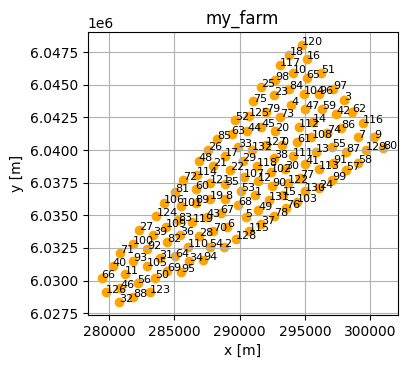

Calculating wind farm power for layout-N-9.1.geom.csv for Wake Model: ['Bastankhah2014_linear']:
[########################################] | 100% Completed | 105.07 ms
[########################################] | 100% Completed | 6.03 ss
Efficiency added to farm results


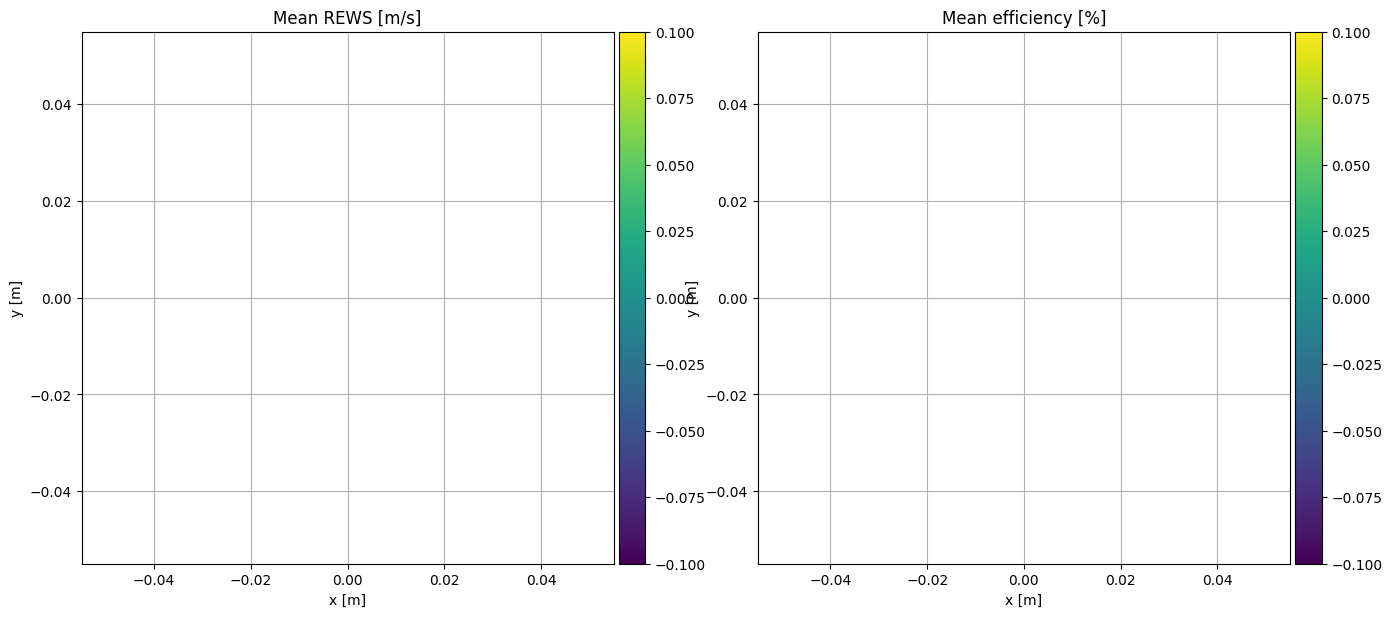

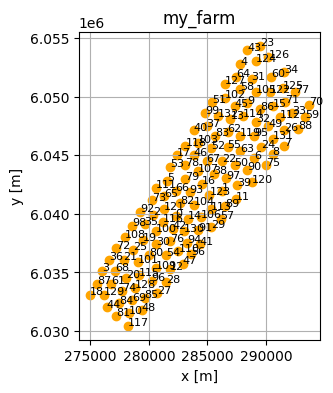

Calculating wind farm power for layout-N-9.2.geom.csv for Wake Model: ['Bastankhah2014_linear']:
[########################################] | 100% Completed | 123.76 ms
[########################################] | 100% Completed | 5.87 ss
Efficiency added to farm results


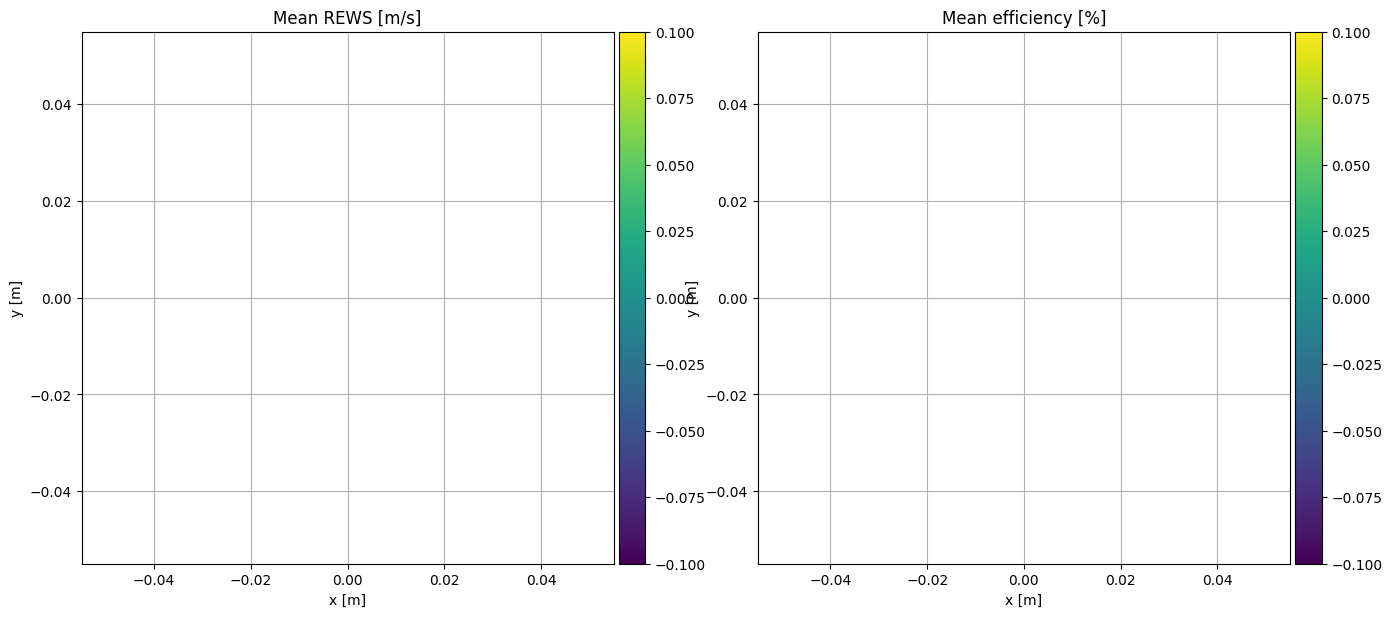

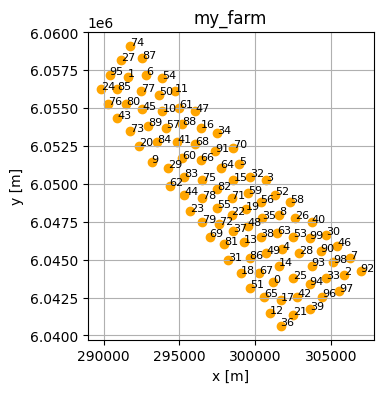

Calculating wind farm power for layout-N-9.3.geom.csv for Wake Model: ['Bastankhah2014_linear']:
[########################################] | 100% Completed | 104.47 ms
[########################################] | 100% Completed | 3.60 ss
Efficiency added to farm results


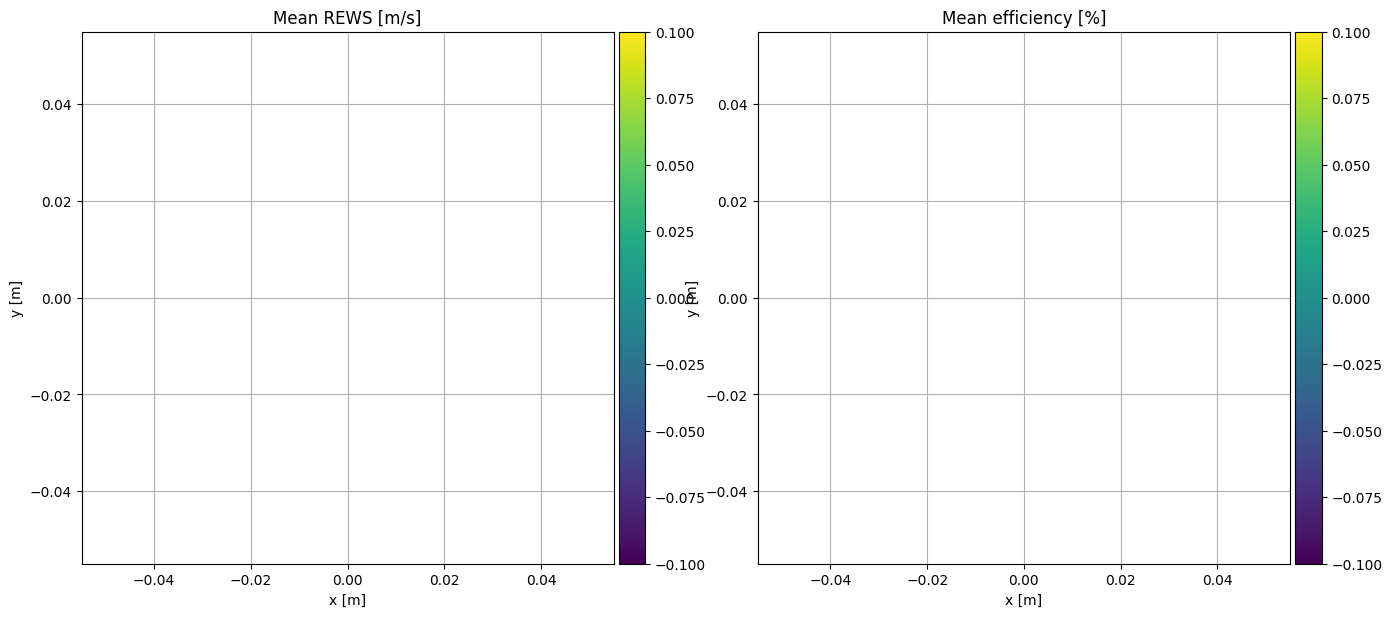

In [3]:
from Foxes_Farm_Power import Foxes_Farm_Power

###-------------------------------------add Turbine Layouts----------------------------------###
# create 3 Dataframes for Turbine Layouts
current_path =  turbines_area_of_interest_path                           # path .csv's
turb_files = os.listdir(turbines_area_of_interest_path)
Turb_dfs = [(read_csv(current_path + file),file) for file in turb_files]


###----------------------------------------Add States-----------------------------------------###
States = foxes.input.states.Timeseries(                      
    data_source = data_2023 ,                                        
    output_vars = [FV.WS, FV.WD, FV.TI, FV.RHO],
    var2col =     {FV.WS: "long-term_WS150", FV.WD: "long-term_WD150", FV.TI: "time"}, 
    fixed_vars =  {FV.RHO: 1.225, FV.TI: 0.05},                  
    )

###--------------------------------------Important Parameters---------------------------------------###
Parameters = dict(                              # passed to the foxes.algorithms.Downwind()
    TType         = "IEA15MW",                  #"NREL5MW","IEA15MW"
    rotor_model   = "centre",
    wake_models   = ["Bastankhah2014_linear"],
    partial_wakes = None,
    )

###--------------------------------------compute farm results--------------------------------------###
Farm_Results = []
for Farm in Turb_dfs:
    Farm_Results.append(Foxes_Farm_Power(Farm,States,Parameters))